In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
wt0_df0 = pd.read_csv(r'D:\WT\Care_To_Compare\Care_To_Compare\Wind Farm A\Wind Farm A\datasets\0.csv', sep=';')

In [29]:
wt0_df0.head()

,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
0,2022-08-03 06:10:00,0,0,train,0,22.0,302.9,129.4,1.7,1.7,...,-496.0,0.0,0.0,-1280.0,-496.0,0.0,0.0,0.0,0.0,26.0
1,2022-08-03 06:20:00,0,1,train,0,22.0,307.1,133.6,1.7,1.7,...,-490.0,0.0,0.0,-1278.0,-490.0,0.0,0.0,0.0,0.0,25.0
2,2022-08-03 06:30:00,0,2,train,0,22.0,340.6,167.1,0.9,0.9,...,-490.0,0.0,0.0,-1356.0,-490.0,0.0,0.0,0.0,0.0,25.0
3,2022-08-03 06:40:00,0,3,train,0,22.0,124.4,-49.1,1.5,1.5,...,-509.0,0.0,0.0,-1274.0,-509.0,0.0,0.0,0.0,0.0,26.0
4,2022-08-03 06:50:00,0,4,train,0,22.0,66.2,-107.3,1.0,1.0,...,-499.0,0.0,0.0,-1284.0,-499.0,0.0,0.0,0.0,0.0,26.0


In [5]:
wt0_df0.columns

Index(['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id',
       'sensor_0_avg', 'sensor_1_avg', 'sensor_2_avg', 'wind_speed_3_avg',
       'wind_speed_4_avg', 'wind_speed_3_max', 'wind_speed_3_min',
       'wind_speed_3_std', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min',
       'sensor_5_std', 'sensor_6_avg', 'sensor_7_avg', 'sensor_8_avg',
       'sensor_9_avg', 'sensor_10_avg', 'sensor_11_avg', 'sensor_12_avg',
       'sensor_13_avg', 'sensor_14_avg', 'sensor_15_avg', 'sensor_16_avg',
       'sensor_17_avg', 'sensor_18_avg', 'sensor_18_max', 'sensor_18_min',
       'sensor_18_std', 'sensor_19_avg', 'sensor_20_avg', 'sensor_21_avg',
       'sensor_22_avg', 'sensor_23_avg', 'sensor_24_avg', 'sensor_25_avg',
       'sensor_26_avg', 'reactive_power_27_avg', 'reactive_power_27_max',
       'reactive_power_27_min', 'reactive_power_27_std',
       'reactive_power_28_avg', 'reactive_power_28_max',
       'reactive_power_28_min', 'reactive_power_28_std', 'power_29_avg',
      

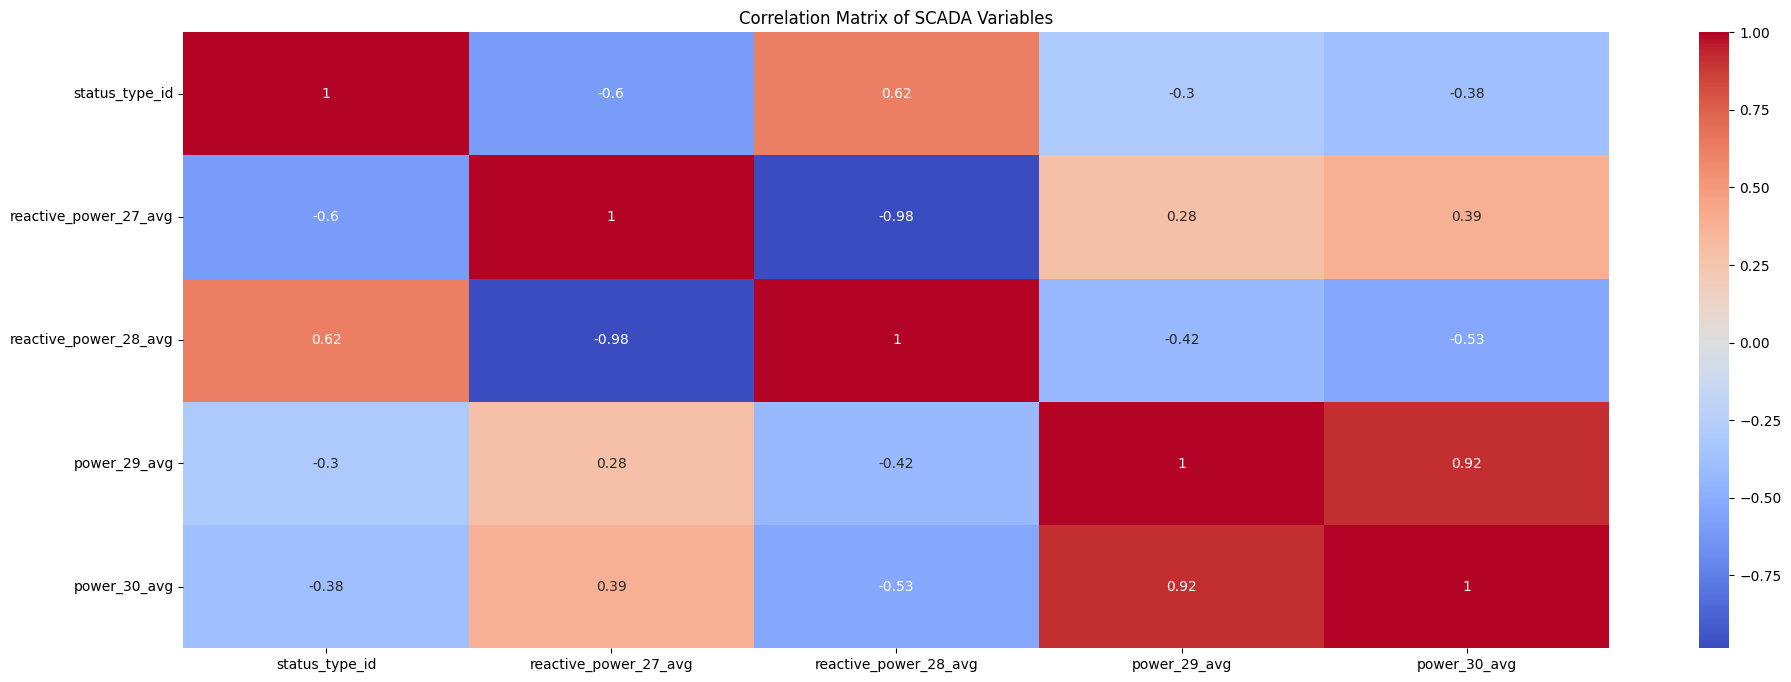

In [39]:
# Correlation matrix
corr_cols = wt0_df0[['status_type_id','reactive_power_27_avg',
       'reactive_power_28_avg', 'power_29_avg',
       'power_30_avg',
       ]]
plt.figure(figsize=(23,8))
sns.heatmap(corr_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of SCADA Variables")
plt.show()

In [21]:
pwoer_col = wt0_df0[['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id','wind_speed_3_avg',
       'wind_speed_4_avg','power_29_avg']]

In [22]:
pwoer_col.set_index(['time_stamp'],inplace = True)

In [23]:
pwoer_col

,asset_id,id,train_test,status_type_id,wind_speed_3_avg,wind_speed_4_avg,power_29_avg
time_stamp,,,,,,,
2022-08-03 06:10:00,0,0,train,0,1.7,1.7,0.000049
2022-08-03 06:20:00,0,1,train,0,1.7,1.7,0.000000
2022-08-03 06:30:00,0,2,train,0,0.9,0.9,0.000000
2022-08-03 06:40:00,0,3,train,0,1.5,1.5,0.000000
2022-08-03 06:50:00,0,4,train,0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...
2023-08-23 05:30:00,0,54981,prediction,3,3.3,0.0,0.000000
2023-08-23 05:40:00,0,54982,prediction,3,2.8,0.0,0.000000
2023-08-23 05:50:00,0,54983,prediction,3,2.7,0.0,0.000000


In [24]:
pwoer_col['status_type_id'].value_counts()

status_type_id
0    41514
5    12265
3     1207
Name: count, dtype: int64

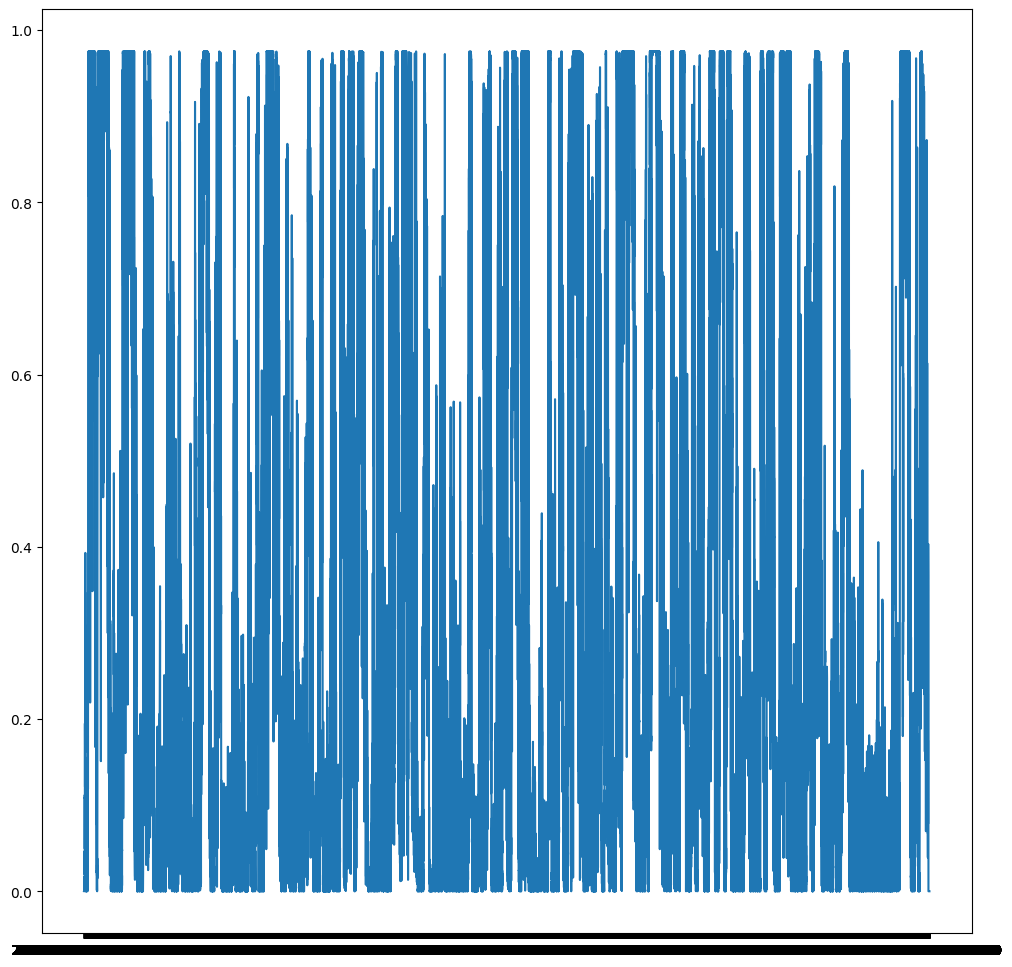

In [25]:
plt.figure(figsize= (12,12))
plt.plot(pwoer_col['power_29_avg'])

In [40]:
wt0_df0 = pd.read_csv(r'D:\WT\Care_To_Compare\Care_To_Compare\Wind Farm A\Wind Farm A\datasets\0.csv', sep=';')

In [41]:
wt0_df0.head()

,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
0,2022-08-03 06:10:00,0,0,train,0,22.0,302.9,129.4,1.7,1.7,...,-496.0,0.0,0.0,-1280.0,-496.0,0.0,0.0,0.0,0.0,26.0
1,2022-08-03 06:20:00,0,1,train,0,22.0,307.1,133.6,1.7,1.7,...,-490.0,0.0,0.0,-1278.0,-490.0,0.0,0.0,0.0,0.0,25.0
2,2022-08-03 06:30:00,0,2,train,0,22.0,340.6,167.1,0.9,0.9,...,-490.0,0.0,0.0,-1356.0,-490.0,0.0,0.0,0.0,0.0,25.0
3,2022-08-03 06:40:00,0,3,train,0,22.0,124.4,-49.1,1.5,1.5,...,-509.0,0.0,0.0,-1274.0,-509.0,0.0,0.0,0.0,0.0,26.0
4,2022-08-03 06:50:00,0,4,train,0,22.0,66.2,-107.3,1.0,1.0,...,-499.0,0.0,0.0,-1284.0,-499.0,0.0,0.0,0.0,0.0,26.0


In [42]:
wt0_df0.set_index('time_stamp', inplace=True)

In [43]:
wt0_df0.head()

,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,wind_speed_3_max,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-08-03 06:10:00,0,0,train,0,22.0,302.9,129.4,1.7,1.7,11.7,...,-496.0,0.0,0.0,-1280.0,-496.0,0.0,0.0,0.0,0.0,26.0
2022-08-03 06:20:00,0,1,train,0,22.0,307.1,133.6,1.7,1.7,8.3,...,-490.0,0.0,0.0,-1278.0,-490.0,0.0,0.0,0.0,0.0,25.0
2022-08-03 06:30:00,0,2,train,0,22.0,340.6,167.1,0.9,0.9,5.9,...,-490.0,0.0,0.0,-1356.0,-490.0,0.0,0.0,0.0,0.0,25.0
2022-08-03 06:40:00,0,3,train,0,22.0,124.4,-49.1,1.5,1.5,7.1,...,-509.0,0.0,0.0,-1274.0,-509.0,0.0,0.0,0.0,0.0,26.0
2022-08-03 06:50:00,0,4,train,0,22.0,66.2,-107.3,1.0,1.0,2.1,...,-499.0,0.0,0.0,-1284.0,-499.0,0.0,0.0,0.0,0.0,26.0


In [46]:
wt0_df0.drop(['asset_id','id', 'status_type_id' ], axis=1, inplace = True)

In [47]:
wt0_df0.head()

,train_test,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,wind_speed_3_max,wind_speed_3_min,wind_speed_3_std,sensor_5_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-08-03 06:10:00,train,22.0,302.9,129.4,1.7,1.7,11.7,0.5,0.7,24.0,...,-496.0,0.0,0.0,-1280.0,-496.0,0.0,0.0,0.0,0.0,26.0
2022-08-03 06:20:00,train,22.0,307.1,133.6,1.7,1.7,8.3,0.4,0.7,24.0,...,-490.0,0.0,0.0,-1278.0,-490.0,0.0,0.0,0.0,0.0,25.0
2022-08-03 06:30:00,train,22.0,340.6,167.1,0.9,0.9,5.9,0.4,0.4,24.0,...,-490.0,0.0,0.0,-1356.0,-490.0,0.0,0.0,0.0,0.0,25.0
2022-08-03 06:40:00,train,22.0,124.4,-49.1,1.5,1.5,7.1,0.6,0.3,24.0,...,-509.0,0.0,0.0,-1274.0,-509.0,0.0,0.0,0.0,0.0,26.0
2022-08-03 06:50:00,train,22.0,66.2,-107.3,1.0,1.0,2.1,0.4,0.3,24.0,...,-499.0,0.0,0.0,-1284.0,-499.0,0.0,0.0,0.0,0.0,26.0


In [61]:
train_df= wt0_df0[wt0_df0['train_test'] =='train']
test_df = wt0_df0[wt0_df0['train_test'] =='prediction']

In [62]:
train_df.drop(['train_test'], axis=1, inplace=True)
test_df.drop(['train_test'], axis=1, inplace=True)

C:\Users\rsaxe\AppData\Local\Temp\ipykernel_27464\1094625650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['train_test'], axis=1, inplace=True)
C:\Users\rsaxe\AppData\Local\Temp\ipykernel_27464\1094625650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['train_test'], axis=1, inplace=True)


In [63]:
print(train_df.info())
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 52148 entries, 2022-08-03 06:10:00 to 2023-08-03 06:00:00
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sensor_0_avg           52148 non-null  float64
 1   sensor_1_avg           52148 non-null  float64
 2   sensor_2_avg           52148 non-null  float64
 3   wind_speed_3_avg       52148 non-null  float64
 4   wind_speed_4_avg       52148 non-null  float64
 5   wind_speed_3_max       52148 non-null  float64
 6   wind_speed_3_min       52148 non-null  float64
 7   wind_speed_3_std       52148 non-null  float64
 8   sensor_5_avg           52148 non-null  float64
 9   sensor_5_max           52148 non-null  float64
 10  sensor_5_min           52148 non-null  float64
 11  sensor_5_std           52148 non-null  float64
 12  sensor_6_avg           52148 non-null  float64
 13  sensor_7_avg           52148 non-null  float64
 14  sensor_8_avg           5214

In [68]:
train_data = train_df.values
test_data = test_df.values

In [70]:
# Scaling the features to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the training data
train_scaled = scaler.fit_transform(train_data)

# Transform the test data based on the training data's scaler
test_scaled = scaler.transform(test_data)


In [71]:

from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import torch

class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.window_size]
        y = self.data[idx + self.window_size]  # Next time step (for forecasting)
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Example: window size of 10 (10 previous time steps to predict the next)
window_size = 10

train_dataset = TimeSeriesDataset(train_scaled, window_size)
test_dataset = TimeSeriesDataset(test_scaled, window_size)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [72]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)  # Predicting the same number of features
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # LSTM output
        output = self.fc(lstm_out[:, -1, :])  # Take the output of the last timestep
        return output

# Set parameters
input_size = train_scaled.shape[1]  # Number of features
hidden_size = 64  # LSTM hidden size
num_layers = 2  # Number of LSTM layers

model = LSTMModel(input_size, hidden_size, num_layers)


In [74]:
import torch.optim as optim
from sklearn.metrics import mean_squared_error

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader)}')


Epoch [1/10], Loss: 0.006014103511279803
Epoch [2/10], Loss: 0.005903849263955479
Epoch [3/10], Loss: 0.005810694751026898
Epoch [4/10], Loss: 0.005719724896598173
Epoch [5/10], Loss: 0.00568007032381245
Epoch [6/10], Loss: 0.005615752778284571
Epoch [7/10], Loss: 0.005564931408427884
Epoch [8/10], Loss: 0.005534645397947427
Epoch [9/10], Loss: 0.005509017498455256
Epoch [10/10], Loss: 0.005467396207508042


In [75]:
# Evaluate on test data
model.eval()
predictions = []
true_values = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        output = model(x_batch)
        predictions.append(output.numpy())
        true_values.append(y_batch.numpy())

predictions = np.concatenate(predictions, axis=0)
true_values = np.concatenate(true_values, axis=0)

# Calculate reconstruction error
reconstruction_error = np.abs(predictions - true_values)

# Define anomaly threshold (e.g., based on quantile or a fixed value)
threshold = np.percentile(reconstruction_error, 95)  # Top 5% as anomaly

# Detect anomalies
anomalies = reconstruction_error > threshold


In [76]:
import torch
import joblib

# Save the trained model weights
torch.save(model.state_dict(), 'lstm_model.pth')

# Save the scaler (scaling weights)
joblib.dump(scaler, 'scaler.pkl')

# ---- Loading them back ----

# Load the trained model weights
# model.load_state_dict(torch.load('lstm_model.pth'))
# model.eval()  # Set the model to evaluation mode

# # Load the scaler (scaling weights)
# scaler = joblib.load('scaler.pkl')

# # Now you can use the model and the scaler for inference:
# new_data = np.random.randn(5, 50)  # Example: new data with 50 features
# scaled_new_data = scaler.transform(new_data)  # Apply the same scaling to new data


['scaler.pkl']

C:\Users\rsaxe\AppData\Local\Temp\ipykernel_27464\3667419982.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


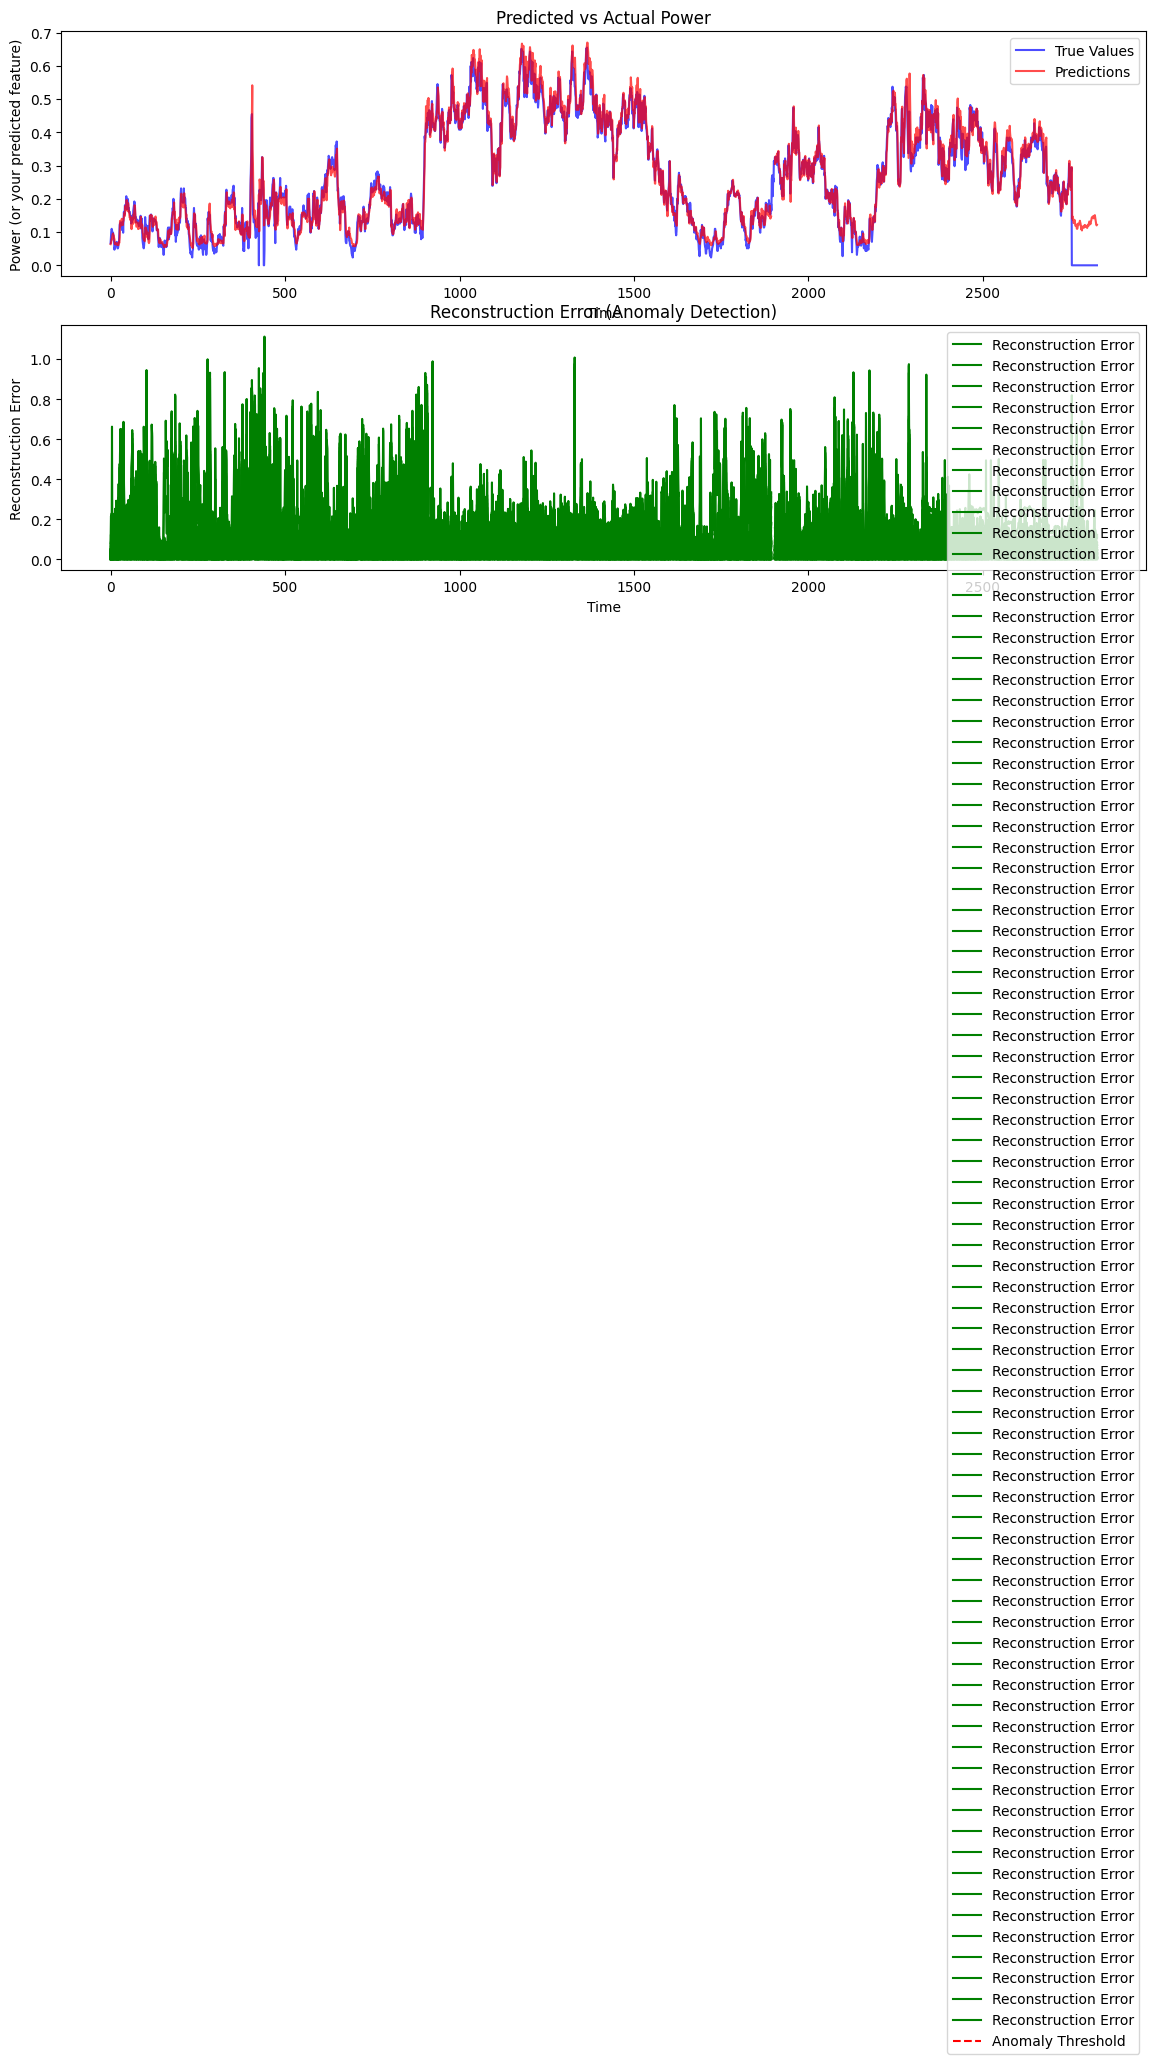

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'predictions' and 'true_values' are your model's output and actual values respectively
# Also assume 'reconstruction_error' is calculated as the absolute difference between predictions and true values

# Sample plot for predictions vs actual values
plt.figure(figsize=(14, 7))

# Plotting predictions vs actual values (if they are univariate or the same feature)
plt.subplot(2, 1, 1)
plt.plot(true_values[:, 4], label='True Values', color='blue', alpha=0.7)
plt.plot(predictions[:, 4], label='Predictions', color='red', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Power (or your predicted feature)')
plt.title('Predicted vs Actual Power')
plt.legend()

# Plotting reconstruction error
plt.subplot(2, 1, 2)
plt.plot(reconstruction_error, label='Reconstruction Error', color='green')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error (Anomaly Detection)')
plt.legend()

# Highlight anomalies
anomalies = reconstruction_error > threshold
plt.scatter(np.where(anomalies)[0], reconstruction_error[anomalies], color='red', label='Anomalies')

plt.tight_layout()
plt.show()
